## **Sentiment Analysis from the lastest tweets done by a person**

In [ ]:
!pip install configparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing the required libraries

In [ ]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import re
import string
import configparser

from wordcloud import WordCloud

Configuring to connect to twitter

In [ ]:
config = configparser.ConfigParser()
config.read('/content/drive/MyDrive/Colab Notebooks/NLP/Twitter API/config.ini')

api_key = config['twitter']['API_KEY']
api_key_secret = config['twitter']['API_KEY_SECRET']

access_token = config['twitter']['ACCESS_TOKEN']
access_token_secret = config['twitter']['ACCESS_TOKEN_SECRET']

print(access_token)

789840900964749312-Dc8m0D5cRCTtWz4mNqQyb3b3Tx1AQC1


In [ ]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

Extracting 100 tweets to analyse

In [ ]:
posts = api.user_timeline(screen_name='ElonMusk', count=100, tweet_mode='extended')
i = 1
for tweet in posts[0:5]:
    # print(tweet.full_text + '\n')
    print(str(i) + ' '+ tweet.full_text + '\n')
    i = i + 1

1 @jmhorp @paulg Interesting

2 @ilyasut Maybe we’re in a computer

3 @waitbutwhy @BillyM2k 🤣

4 @AltcoinGordon I am

5 I will keep supporting Dogecoin



Creating a dataframe with a column called Tweets

In [ ]:
df = pd.DataFrame ([twee.full_text for twee in posts], columns=['Tweets'])
df.head()

,Tweets
0,@jmhorp @paulg Interesting
1,@ilyasut Maybe we’re in a computer
2,@waitbutwhy @BillyM2k 🤣
3,@AltcoinGordon I am
4,I will keep supporting Dogecoin


Cleaning the tweets

In [ ]:
def cleanTweet(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes mentions (small r inside sub tell python that the expression is a raw string)
  text = re.sub(r'#', '', text) #removes hashtages
  text = re.sub(r'RT[\s]+', '', text) #removes retweets
  text = re.sub(r'https?:\/\/\S+', '', text) #removes hyperlink
  # text = re.sub('[0-9.:,?-_'']', '', text) 
  text = re.sub(r'[^A-Za-z]', ' ', text) # removes numbers and punctuations
  text = text.lower()

  return text

df['Tweets'] = df['Tweets'].apply(cleanTweet)

df.head()

,Tweets
0,interesting
1,maybe we re in a computer
2,
3,i am
4,i will keep supporting dogecoin


Calculating Subjectivity and Polarity of the tweets using textblob and adding them as new columns

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,interesting,0.500000,0.500000
1,maybe we re in a computer,0.000000,0.000000
2,,0.000000,0.000000
3,i am,0.000000,0.000000
4,i will keep supporting dogecoin,0.250000,0.250000
...,...,...,...
95,correct,0.000000,0.000000
96,original top gun is a great movie just rewatc...,0.666667,0.558333
97,so far the entire history of human civi...,0.498611,0.050000
98,yeah it s crazy model has the most us co...,0.700000,-0.050000


Visualizing the wordcloud to see the most used word in the entire 100 latest tweets

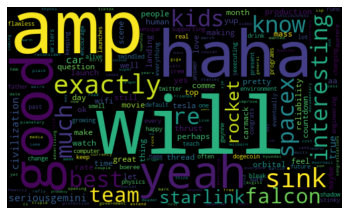

In [ ]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Analysing the Polarity score and classiying the tweets as Positive, Negative, or Neutral

In [ ]:
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,interesting,0.500000,0.500000,Positive
1,maybe we re in a computer,0.000000,0.000000,Neutral
2,,0.000000,0.000000,Neutral
3,i am,0.000000,0.000000,Neutral
4,i will keep supporting dogecoin,0.250000,0.250000,Positive
...,...,...,...,...
95,correct,0.000000,0.000000,Neutral
96,original top gun is a great movie just rewatc...,0.666667,0.558333,Positive
97,so far the entire history of human civi...,0.498611,0.050000,Positive
98,yeah it s crazy model has the most us co...,0.700000,-0.050000,Negative


Scatterplot to see the distribution of tweets in Subjectivity and Polarity Graph

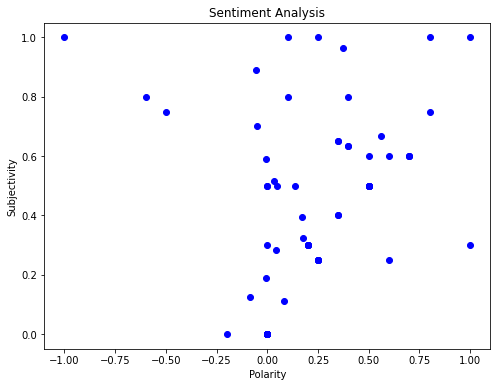

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Counting the number of tweets in each class: Positive, Negative and Neutral

In [ ]:
df['Analysis'].value_counts()

Neutral     46
Positive    45
Negative     9
Name: Analysis, dtype: int64

Bar plot to show the sentiment of the person from his latest 100 tweets

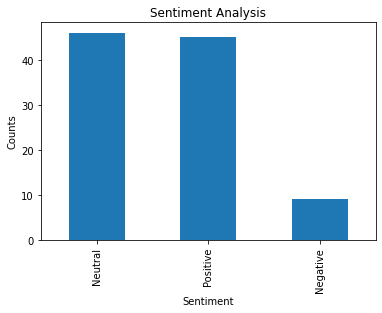

In [ ]:
df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()